### Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import pmdarima as pm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA


from datetime import date
from datetime import timedelta

import plotly.express as px
import plotly.graph_objs as go 

### Dataset

In [2]:
forex = "EURUSD=X"

In [3]:
# set the start and end date for the historical data
start_date = '2004-01-01'
end_date = date.today().strftime("%Y-%m-%d")

In [4]:
yf.pdr_override() # <== that's all it takes :-)

In [5]:
# download dataframe
df = pdr.get_data_yahoo(forex, start=start_date, end=end_date, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [6]:
# save the data to a CSV file
path = "data/" + forex + ".csv"
df.to_csv(path, index=True)

In [7]:
df = pd.read_csv("data/EURUSD=X.csv", index_col = "Date")
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [8]:
df.shape

(5011, 6)

In [9]:
df.tail()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-04-20  1.095218  1.098901  1.093434  1.095218   1.095218       0
2023-04-21  1.097093  1.099251  1.093972  1.097093   1.097093       0
2023-04-24  1.099227  1.103424  1.096876  1.099227   1.099227       0
2023-04-25  1.105950  1.106807  1.096924  1.105950   1.105950       0
2023-04-26  1.097839  1.109410  1.096924  1.097839   1.097839       0

In [10]:
df.describe()

Open         High          Low        Close    Adj Close  Volume
count  5011.000000  5011.000000  5011.000000  5011.000000  5011.000000  5011.0
mean      1.242171     1.246830     1.237063     1.242182     1.242182     0.0
std       0.125902     0.126595     0.126343     0.125896     0.125896     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.132355     1.136007     1.128847     1.132407     1.132407     0.0
50%       1.230784     1.235025     1.225896     1.230800     1.230800     0.0
75%       1.334125     1.338231     1.328559     1.334045     1.334045     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

In [11]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Basic Visualization

In [12]:
columns = ["Open", "High", "Low", "Close", "Adj Close"]
for col in columns:
    title = "Line chart of " + col
    fig = px.line(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [13]:
for col in columns:
    title = "Area chart of " + col
    fig = px.area(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [14]:
# for col in columns:
#     title = "Histogram of " + col
#     fig = px.histogram(df, x=df.index, y=col, title = title)
#     fig.update_traces(xbins_size="M12")
#     fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12", tickformat="%b\n%Y")
#     fig.update_layout(bargap=0.5)
#     fig.show()

In [15]:
# result = seasonal_decompose(df['Open'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

In [16]:
# result = seasonal_decompose(df['Close'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

[1.         0.99695581 0.99516524 0.99353982 0.9918587  0.99014398
 0.9884519  0.98688286 0.98504138 0.98304487 0.98126367 0.97947367
 0.97759789 0.97569119 0.97391099 0.97206969 0.97013998 0.96827671
 0.96629112 0.96444493 0.96244443 0.96055181 0.95883436 0.95709083
 0.9550091  0.95307193 0.95124004 0.94941535 0.94751791 0.94560943
 0.94350222 0.94151895 0.93979856 0.93792894 0.93598636 0.93416908
 0.93232104]


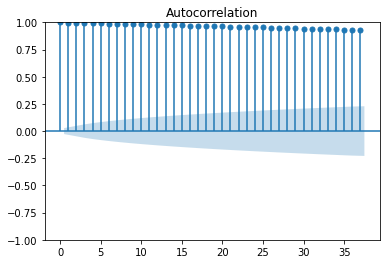

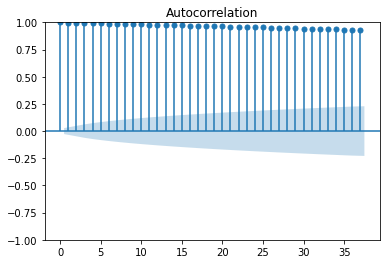

In [17]:
acf_values = acf(df['Close'])
print(acf_values)
plot_acf(df['Close'])

[ 1.00000000e+00  9.97154802e-01  2.19082601e-01  8.05208033e-02
  1.50070925e-02 -3.34654194e-03  7.97209441e-04  2.26395372e-02
 -4.02429976e-02 -4.88654434e-02  1.54448182e-02  6.72140075e-03
 -1.13153290e-02 -1.24804563e-02  1.47541410e-02 -2.55021155e-03
 -1.38170074e-02  2.02507262e-03 -2.51105674e-02  1.67219557e-02
 -1.94390992e-02  7.86312407e-03  3.47736326e-02  1.53513351e-02
 -5.81490396e-02 -1.89250460e-03  1.73527110e-02  1.21977383e-02
 -7.08424077e-03 -1.33693284e-02 -4.65412258e-02  1.00873539e-02
  5.74286130e-02 -9.51866794e-03 -2.05618585e-02  1.77506191e-02
  8.92718420e-04]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



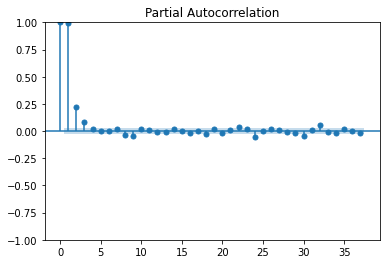

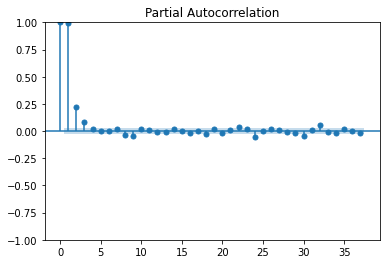

In [18]:
pacf_values = pacf(df['Close'])
print(pacf_values)
plot_pacf(df['Close'])

[1.         0.99698816 0.99515521 0.99341709 0.99171788 0.99006952
 0.98844878 0.98674148 0.98507688 0.9830929  0.98118936 0.97936447
 0.97749534 0.97568806 0.97382663 0.97195594 0.97019433 0.96824717
 0.96624128 0.96432537 0.96252038 0.96048198 0.9587863  0.95698638
 0.95496601 0.95304554 0.95126153 0.94953263 0.94754461 0.94558847
 0.9436488  0.9417619  0.93980534 0.93799002 0.93620929 0.93430784
 0.93241069]


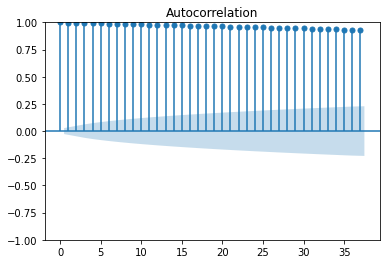

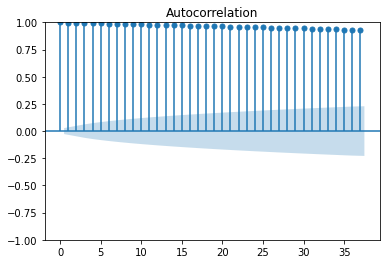

In [19]:
acf_values = acf(df['Open'])
print(acf_values)
plot_acf(df['Open'])

[ 1.          0.99718716  0.20832556  0.06253304  0.02422174  0.0169606
  0.01134561 -0.01200667  0.00193159 -0.05926472 -0.01232121  0.00903697
 -0.0052503   0.00792896 -0.00729868 -0.003559    0.01818176 -0.02434704
 -0.02387831  0.00408061  0.02371984 -0.03554237  0.04806364  0.00323417
 -0.0432424   0.00290141  0.02808666  0.02001358 -0.04523218 -0.00988793
 -0.00594685  0.00873066 -0.00613723  0.01823797  0.01568434 -0.01822903
 -0.00494944]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



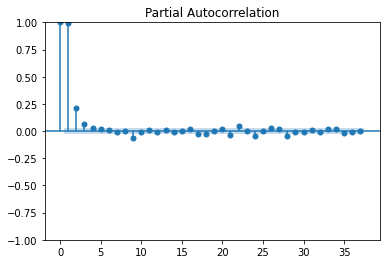

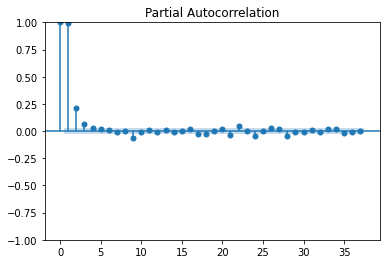

In [20]:
pacf_values = pacf(df['Open'])
print(pacf_values)
plot_pacf(df['Open'])

### Preprocessing (Close)

In [21]:
def adf(col):
    adf = adfuller(df.loc[:, col].values, autolag = 'AIC')
    print("ADF Statistic:", adf[0])
    print("p-value:", adf[1])
    print("n_lags:", adf[2])
    for key, value in adf[4].items():
        print("Critical values:", key, value)
    if(adf[1]<0.05):
        print("Stationary data")
    else:
        print("Non-stationary data") 

In [22]:
adf('Close')

ADF Statistic: -1.8858588914638017
p-value: 0.33874249613894647
n_lags: 31
Critical values: 1% -3.431664053939323
Critical values: 5% -2.862120669208014
Critical values: 10% -2.5670790910161703
Non-stationary data


In [23]:
adf('Open')

ADF Statistic: -1.941510217882622
p-value: 0.3127922789185541
n_lags: 27
Critical values: 1% -3.4316629985656144
Critical values: 5% -2.862120202950329
Critical values: 10% -2.5670788428088773
Non-stationary data


<AxesSubplot:xlabel='Date'>

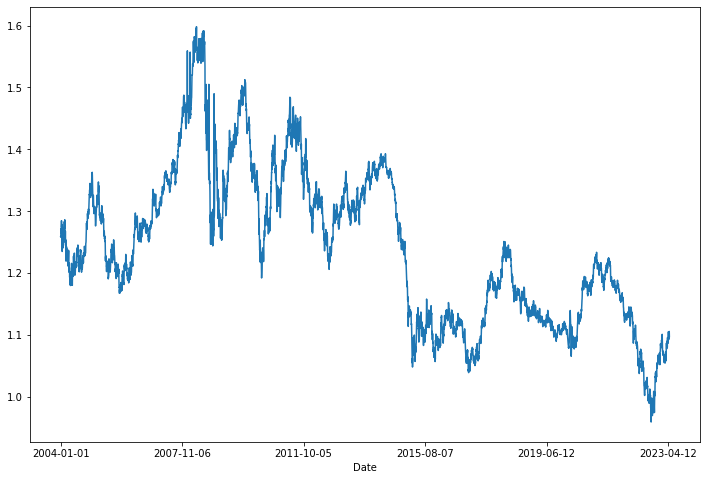

In [24]:
df['Open'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

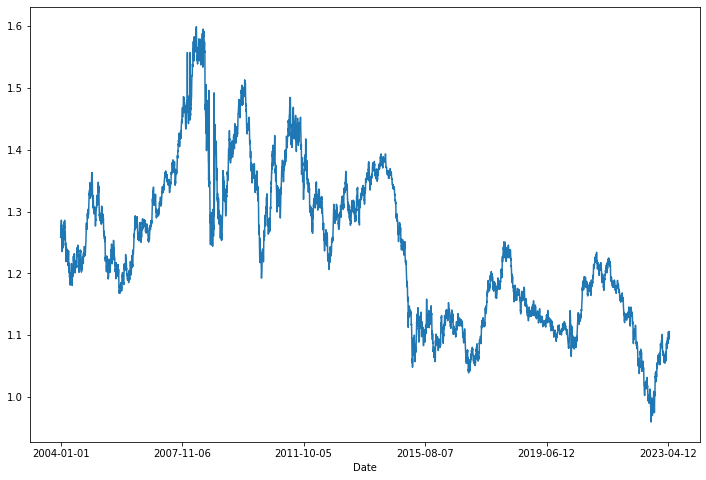

In [25]:
df['Close'].plot(figsize=(12,8))

In [26]:
df["Close_diff1"] = df["Close"].diff(periods=100)
df["Close_diff2"] = df["Close"].diff(periods=200)
df["Close_diff3"] = df["Close"].diff(periods=300)

df["Open_diff1"] = df["Open"].diff(periods=100)
df["Open_diff2"] = df["Open"].diff(periods=200)
df["Open_diff3"] = df["Open"].diff(periods=300)

In [27]:
# df = df.dropna()

In [28]:
# results = adfuller(df["Close_diff1"].dropna())
# results

<AxesSubplot:xlabel='Date'>

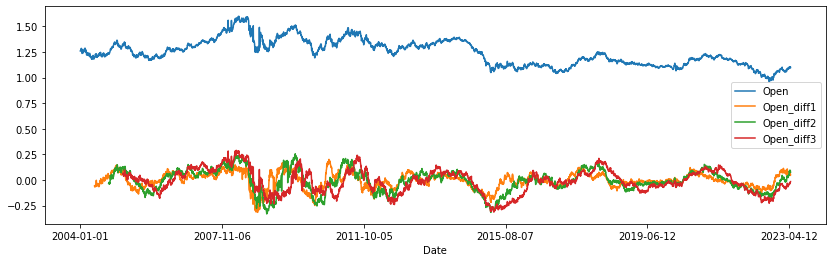

In [29]:
df.plot(y = ["Open", "Open_diff1", "Open_diff2", "Open_diff3"],figsize=(14, 4))

<AxesSubplot:xlabel='Date'>

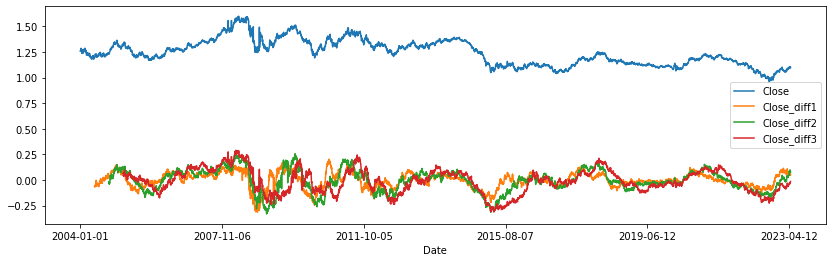

In [30]:
df.plot(y = ["Close", "Close_diff1", "Close_diff2", "Close_diff3"],figsize=(14, 4))

In [31]:
df = df.dropna()
print("--------------OPEN---------------")
print(adf('Open_diff1'))
print(adf('Open_diff2'))
print(adf('Open_diff3'))
print("--------------CLOSE---------------")
print(adf('Close_diff1'))
print(adf('Close_diff2'))
print(adf('Close_diff3'))

--------------OPEN---------------
ADF Statistic: -4.873298592095236
p-value: 3.9297245920794884e-05
n_lags: 25
Critical values: 1% -3.431746560628211
Critical values: 5% -2.8621571196498476
Critical values: 10% -2.567098495106319
Stationary data
None
ADF Statistic: -3.6786270128339797
p-value: 0.004424028062810676
n_lags: 8
Critical values: 1% -3.4317415086267644
Critical values: 5% -2.86215488776668
Critical values: 10% -2.567097306976895
Stationary data
None
ADF Statistic: -3.4190200574068337
p-value: 0.010327317535133036
n_lags: 27
Critical values: 1% -3.431747157394073
Critical values: 5% -2.862157383289998
Critical values: 10% -2.5670986354535916
Stationary data
None
--------------CLOSE---------------
ADF Statistic: -4.58672462907085
p-value: 0.00013664620901127902
n_lags: 31
Critical values: 1% -3.431748352457134
Critical values: 5% -2.8621579112466553
Critical values: 10% -2.5670989165082183
Stationary data
None
ADF Statistic: -3.6616836777905197
p-value: 0.00468555076148407
n_l

In [32]:
# change filter value for open
df_close = df.filter(['Close', 'Close_diff1'])

# change df_close to open for open
# also ctrl+f and change close to open everywhere for open
close_dataset = df_close.values

train_close_len = math.ceil(len(close_dataset) * 0.8)
test_close_len = len(close_dataset) - train_close_len
print("Training length is: ", train_close_len)
print("Testing length is: ", test_close_len)

Training length is:  3769
Testing length is:  942


In [33]:
# # Creating the training/testing data

train_data_close = pd.DataFrame(df_close['Close'][0:math.ceil(len(close_dataset)*0.80)])
test_data_close = pd.DataFrame(df_close['Close'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

print("Training length is: ", train_data_close.shape)
print("Testing length is: ", test_data_close.shape)


Training length is:  (3769, 1)
Testing length is:  (942, 1)


In [34]:
stationary_test_data_close

Close_diff1
Date                   
2019-09-17    -0.014432
2019-09-18    -0.011050
2019-09-19    -0.018460
2019-09-20    -0.015234
2019-09-23    -0.015452
...                 ...
2023-04-20     0.052683
2023-04-21     0.044251
2023-04-24     0.044809
2023-04-25     0.056258
2023-04-26     0.050938

[942 rows x 1 columns]

In [35]:
# Scaling training data

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled_close_data = scaler.fit_transform(train_data_close)
# stationary_train_scaled_close_data = scaler.fit_transform(stationary_train_data_close)
train_scaled_close_data

array([[0.51015828],
       [0.50496611],
       [0.49691057],
       ...,
       [0.11129677],
       [0.11930375],
       [0.12379249]])

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
test_scaled_close_data = scaler.fit_transform(test_data_close)
# stationary_test_scaled_close_data = scaler.fit_transform(stationary_test_data_close)
test_scaled_close_data

array([[0.51358658],
       [0.53863041],
       [0.52287476],
       [0.52909121],
       [0.51835814],
       [0.50913423],
       [0.51756165],
       [0.49426323],
       [0.48327958],
       [0.49055135],
       [0.47486519],
       [0.48771803],
       [0.49820008],
       [0.50245266],
       [0.50653804],
       [0.50126791],
       [0.49688722],
       [0.50697797],
       [0.51544057],
       [0.52235188],
       [0.52198838],
       [0.52407254],
       [0.53871987],
       [0.55775529],
       [0.56815656],
       [0.56670646],
       [0.55852225],
       [0.55965053],
       [0.54929313],
       [0.54211864],
       [0.54754206],
       [0.55324995],
       [0.56770316],
       [0.56865513],
       [0.5721047 ],
       [0.55825168],
       [0.53845192],
       [0.5370674 ],
       [0.518597  ],
       [0.51959717],
       [0.52433832],
       [0.51592654],
       [0.51623576],
       [0.51888884],
       [0.53149414],
       [0.53778181],
       [0.54056648],
       [0.540

### Models

#### Some functions

In [37]:
# Metrics
def metrics(test, predictions):
    mse = mean_squared_error(test, predictions, squared = True)
    rmse = math.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)

In [38]:
def pred_plot(test, pred):
    plt.plot(test)
    plt.plot(pred, color='red')
    plt.show()

#### Auto Regressive

In [39]:
ar_model = AutoReg(train_scaled_close_data, lags = test_data_close.shape[0])
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 4.89998494e-05  8.58653538e-01  1.15567301e-01  6.13628368e-03
 -1.36621157e-02  4.67814461e-03  2.00047883e-02  6.02544444e-02
 -3.18968618e-02 -2.42899984e-02  3.07432515e-02 -4.45481102e-02
 -1.39754222e-02  3.30809331e-02 -5.12337593e-03 -1.38515485e-02
  4.79286470e-04  4.73869460e-02 -2.49335312e-02 -5.45292429e-03
 -5.60436264e-03 -4.93496605e-03 -1.47485134e-02  7.20124803e-02
 -3.64023415e-02 -5.63140326e-02  2.64614333e-02  2.09779438e-02
  8.92203158e-03  2.38136263e-02 -8.71621690e-02  5.36658653e-02
  3.13138137e-03 -9.36823310e-03 -3.87537022e-02  8.38725735e-02
 -6.15761322e-02  5.61161835e-02 -5.01377350e-02  7.14484861e-03
  1.10223429e-02 -5.08248039e-02 -3.87856024e-02  2.35496496e-01
 -1.89454466e-01  1.04986470e-02  1.93386152e-02 -4.41259976e-02
  8.12212938e-02 -4.74529115e-02  3.38649583e-02 -1.74544735e-02
 -2.83964197e-02  5.98802696e-03  3.57061434e-02  2.29372851e-02
 -2.23006661e-02 -4.11883789e-02  4.36627234e-02  3.29899707e-02
 -5.4491257

In [40]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.129213, expected=0.513587
predicted=0.125759, expected=0.538630
predicted=0.130517, expected=0.522875
predicted=0.127573, expected=0.529091
predicted=0.127983, expected=0.518358
predicted=0.115753, expected=0.509134
predicted=0.118836, expected=0.517562
predicted=0.107942, expected=0.494263
predicted=0.117406, expected=0.483280
predicted=0.116504, expected=0.490551
predicted=0.107108, expected=0.474865
predicted=0.109231, expected=0.487718
predicted=0.111888, expected=0.498200
predicted=0.113770, expected=0.502453
predicted=0.117147, expected=0.506538
predicted=0.108891, expected=0.501268
predicted=0.111132, expected=0.496887
predicted=0.102547, expected=0.506978
predicted=0.106642, expected=0.515441
predicted=0.104159, expected=0.522352
predicted=0.104037, expected=0.521988
predicted=0.101129, expected=0.524073
predicted=0.093995, expected=0.538720
predicted=0.092844, expected=0.557755
predicted=0.093247, expected=0.568157
predicted=0.088248, expected=0.566706
predicted=0.

In [41]:
metrics(test_scaled_close_data, predictions)

MSE: 0.2836896234184643
RMSE: 0.5326252185340686
MAE: 0.4837367694052978


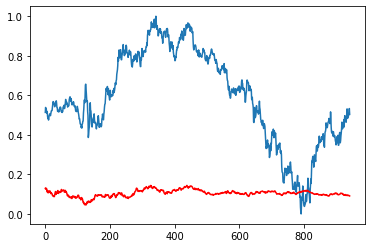

In [42]:
pred_plot(test_scaled_close_data, predictions)

In [43]:
ar_model = AutoReg(train_scaled_close_data, lags = 30)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 9.21482360e-04  7.38504114e-01  1.70576662e-01  7.17251610e-02
  1.91132245e-02 -4.25978782e-03 -6.88882701e-04  7.01047964e-02
 -2.05451325e-02 -6.34694534e-02  1.79344868e-02  1.84121506e-02
 -1.06482414e-02 -2.32362760e-02  1.90987789e-02  1.13034204e-02
 -1.81660619e-02  1.94059456e-02 -3.08121747e-02  3.10327083e-02
 -3.42006114e-02 -2.06472473e-02  2.59920848e-02  6.61742292e-02
 -6.48727595e-02 -2.25904600e-02  1.38215809e-02  2.45456577e-02
  1.64807496e-02  2.65145230e-02 -4.90653716e-02]


In [44]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.122245, expected=0.513587
predicted=0.122330, expected=0.538630
predicted=0.123159, expected=0.522875
predicted=0.124716, expected=0.529091
predicted=0.124213, expected=0.518358
predicted=0.123918, expected=0.509134
predicted=0.125038, expected=0.517562
predicted=0.126061, expected=0.494263
predicted=0.125297, expected=0.483280
predicted=0.126205, expected=0.490551
predicted=0.127686, expected=0.474865
predicted=0.128101, expected=0.487718
predicted=0.127748, expected=0.498200
predicted=0.128527, expected=0.502453
predicted=0.129238, expected=0.506538
predicted=0.130570, expected=0.501268
predicted=0.130169, expected=0.496887
predicted=0.130004, expected=0.506978
predicted=0.130402, expected=0.515441
predicted=0.130491, expected=0.522352
predicted=0.130672, expected=0.521988
predicted=0.132284, expected=0.524073
predicted=0.132961, expected=0.538720
predicted=0.132894, expected=0.557755
predicted=0.133275, expected=0.568157
predicted=0.133774, expected=0.566706
predicted=0.

In [45]:
metrics(test_scaled_close_data, predictions)

MSE: 0.17107187480355196
RMSE: 0.41360835920415334
MAE: 0.36016884116049935


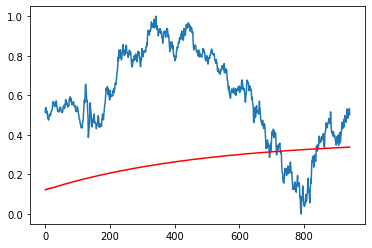

In [46]:
pred_plot(test_scaled_close_data, predictions)

In [47]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [48]:
ar_model = AutoReg(stationary_train_data_close, lags = 942)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [-1.97031848e-04  8.24467058e-01  1.59019961e-01  2.96376790e-03
 -6.23032698e-03 -9.94821342e-03  2.73076663e-02  5.04337152e-02
 -3.08363643e-02 -2.16750412e-02  2.33005977e-02 -3.36738278e-02
 -2.00925242e-02  2.39795063e-02  1.74109911e-02 -2.36520816e-02
  1.37983248e-03  5.19957241e-02 -4.06255823e-02  1.49877831e-02
 -2.32273257e-02 -6.86455188e-03 -1.35595424e-02  7.13637268e-02
 -3.88029691e-02 -4.76425692e-02  3.12590856e-02  2.36991426e-02
  6.72758722e-03  1.45987683e-02 -7.81693249e-02  4.56406486e-02
  1.94736447e-02 -2.63562308e-02 -4.15594590e-02  7.02795294e-02
 -3.18886944e-02  4.68912538e-02 -5.15133155e-02  1.08638062e-03
  1.31999089e-02 -4.14500161e-02 -3.97139860e-02  2.38499717e-01
 -1.88720640e-01  6.73034132e-04  1.03955060e-02 -2.47556082e-02
  6.79432116e-02 -3.95535772e-02  3.13213862e-02 -2.35808319e-02
 -2.04184605e-02  2.47824590e-03  2.70105633e-02  2.51901909e-02
 -1.77187120e-02 -3.89996505e-02  4.84383303e-02  3.32156371e-02
 -5.1187458

In [49]:
predictions = ar_model_fit.predict(start=len(stationary_train_data_close), end=len(stationary_train_data_close)+len(stationary_test_data_close)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], stationary_test_data_close[i]))

predicted=-0.000999, expected=-0.014432
predicted=-0.004546, expected=-0.011050
predicted=-0.009062, expected=-0.018460
predicted=-0.010761, expected=-0.015234
predicted=-0.011164, expected=-0.015452
predicted=-0.018693, expected=-0.019209
predicted=-0.018196, expected=-0.018499
predicted=-0.022559, expected=-0.023816
predicted=-0.017308, expected=-0.027558
predicted=-0.020850, expected=-0.027937
predicted=-0.030789, expected=-0.033680
predicted=-0.031514, expected=-0.029761
predicted=-0.025823, expected=-0.024077
predicted=-0.024131, expected=-0.023186
predicted=-0.019855, expected=-0.018696
predicted=-0.023944, expected=-0.019319
predicted=-0.018280, expected=-0.020846
predicted=-0.023341, expected=-0.016768
predicted=-0.029839, expected=-0.017352
predicted=-0.032308, expected=-0.017963
predicted=-0.030182, expected=-0.016482
predicted=-0.027412, expected=-0.013596
predicted=-0.026215, expected=-0.006241
predicted=-0.021058, expected=-0.000396
predicted=-0.023294, expected=-0.001832


In [50]:
metrics(stationary_test_data_close, predictions)

MSE: 0.0028966431698221194
RMSE: 0.05382047166108933
MAE: 0.04363349644089768


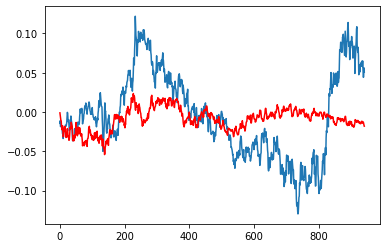

In [51]:
pred_plot(stationary_test_data_close, predictions)

In [52]:
# def train_test_pred_plot(train, test, pred):
#     figure(figsize=(10,6))
#     plt.plot(train, 'green', label='Train data')
#     plt.plot(test, 'blue', label='Test data')
#     plt.plot(pred, 'blue', label='Test predictions')
#     plt.legend()

In [53]:
df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [54]:
df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [55]:
forecast = ar_model_fit.predict(start=train_close_len + test_close_len, end=train_close_len + test_close_len + 730)
df_forecast = pd.DataFrame({'Forecast': predictions}, index=pd.RangeIndex(start=train_close_len + test_close_len, stop=train_close_len + test_close_len + 942, step=1))

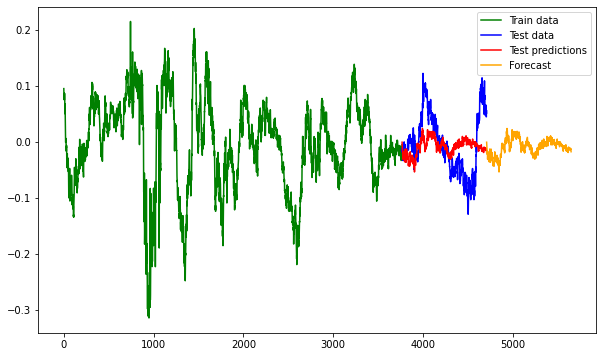

In [56]:
plt.figure(figsize=(10,6))
plt.plot(stationary_train_data_close, 'green', label='Train data')
plt.plot(df_pls['Values'], 'blue', label='Test data')
plt.plot(df_pls2['Predictions'], 'red', label='Test predictions')
plt.plot(df_forecast['Forecast'], 'orange', label = 'Forecast')
plt.legend()

#### Moving Average

In [57]:
df_ma = df_close.copy()

df_ma['MA50'] = df_ma['Close'].rolling(50).mean()
df_ma['MA100'] = df_ma['Close'].rolling(100).mean()
df_ma['MA200'] = df_ma['Close'].rolling(200).mean()

In [58]:
from plotly.offline import iplot 

fig = go.Figure(data=[go.Scatter(x=df_ma.index,
                                 y=df_ma["Close"], 
                                 line = dict(color = "blue"), name="Close"), 
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA50"], 
                                 line=dict(color='orange', width=2), name="MA50"),
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA100"], 
                                 line=dict(color='green', width=2), name="MA100"),
                     go.Scatter(x=df_ma.index,
                                 y=df_ma["MA200"], 
                                 line=dict(color='magenta', width=2), name="MA200")])

fig.update_layout(
    plot_bgcolor = "white",
    title_text="Close Price and its moving average for Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text="<b>Close and Moving Average</b>")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black", 
                 title_text="<b>Date</b>")



iplot(fig)

In [59]:
df_ma_copy = df_ma.copy()

df_ma_copy.dropna(inplace = True)

In [60]:
metrics(df_ma_copy['Close'], df_ma_copy['MA50'])

MSE: 0.000897975385359402
RMSE: 0.029966237424131213
MAE: 0.021863301430188165


In [61]:
metrics(df_ma_copy['Close'], df_ma_copy['MA100'])

MSE: 0.0018527458131550342
RMSE: 0.04304353392967444
MAE: 0.03176355937931765


In [62]:
metrics(df_ma_copy['Close'], df_ma_copy['MA200'])

MSE: 0.003938926420385515
RMSE: 0.06276086695055698
MAE: 0.049175430730725014


#### ARIMA

In [63]:
stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

In [67]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [68]:
from pmdarima import auto_arima

model = auto_arima(stationary_train_data_close, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(stationary_train_data_close)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21214.391, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20950.924, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21178.383, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21214.743, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20952.912, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-21214.867, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21214.190, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-21214.424, Time=1.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-21216.189, Time=0.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-21215.293, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-21212.147, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-21218.165, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-21216.721, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-21216.400, Time=0.44 sec
 ARIM

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [70]:
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

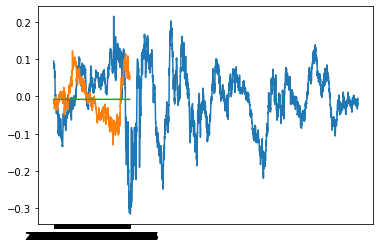

In [72]:
forecast = model.predict(n_periods=len(stationary_test_data_close))
forecast = pd.DataFrame(forecast,index = stationary_test_data_close.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(stationary_train_data_close, label='Train')
plt.plot(stationary_test_data_close, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3769
Model:               SARIMAX(0, 1, 2)   Log Likelihood               10612.083
Date:                Thu, 27 Apr 2023   AIC                         -21218.165
Time:                        16:02:12   BIC                         -21199.462
Sample:                             0   HQIC                        -21211.515
                               - 3769                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2701      0.004    -61.522      0.000      -0.279      -0.261
ma.L2         -0.0329      0.010     -3.203      0.001      -0.053      -0.013
sigma2         0.0002   1.11e-06    188.280      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            335522.29
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
PLSWORKIMTIREDDDDDDD = pd.date_range('2019-09-17', '2023-04-26')
predictions = arima_model.predict(n_periods = len(stationary_test_data_close))

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [ ]:
df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [ ]:
df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

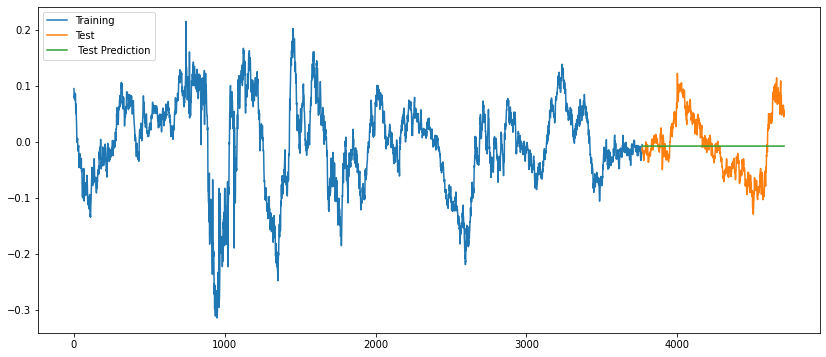

In [ ]:
plt.figure(figsize = (14, 6))
plt.plot(stationary_train_data_close, label = "Training")
plt.plot(df_pls['Values'], label = "Test")
plt.plot(df_pls2['Predictions'], label = " Test Prediction")
# plt.plot(next_pred, label = "Next 30 Days Prediction")
plt.legend(loc = "upper left")

In [ ]:
metrics(stationary_test_data_close, predictions)

MSE: 0.0028551699487417317
RMSE: 0.05343379032729881
MAE: 0.04337143881314961


In [ ]:
# mymodel = ARIMA(stationary_train_data_close, order = (0,1,2))  
# modelfit = mymodel.fit()  
# print(modelfit.summary()) 

In [ ]:
# print(modelfit.summary())

In [ ]:
# predictions = modelfit.predict(start=len(stationary_train_data_close), end=len(stationary_train_data_close)+len(stationary_test_data_close)-1, dynamic=False)
# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], stationary_test_data_close[i]))

In [ ]:
# df_pls = pd.DataFrame({'Values': stationary_test_data_close.flatten()}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [ ]:
# df_pls2 = pd.DataFrame({'Predictions': predictions}, index=pd.RangeIndex(start=train_close_len, stop=train_close_len + test_close_len, step=1))

In [ ]:
# forecast = ar_model_fit.predict(start=train_close_len + test_close_len, end=train_close_len + test_close_len + 730)
# df_forecast = pd.DataFrame({'Forecast': predictions}, index=pd.RangeIndex(start=train_close_len + test_close_len, stop=train_close_len + test_close_len + 942, step=1))

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(stationary_train_data_close, 'green', label='Train data')
# plt.plot(df_pls['Values'], 'blue', label='Test data')
# plt.plot(df_pls2['Predictions'], 'red', label='Test predictions')
# plt.plot(df_forecast['Forecast'], 'orange', label = 'Forecast')
# plt.legend()